In [154]:
#Importando as bibliotecas que vão ser utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [136]:
#Ignorando alertas realizado pelo pandas
warnings.filterwarnings("ignore")

In [3]:
#Importando o arquivo
df = pd.read_csv("preco_automoveis.csv", sep=";")
df

,data,valor
0,01/01/1993,66168
1,01/02/1993,73042
2,01/03/1993,98691
3,01/04/1993,88839
4,01/05/1993,101055
...,...,...
354,01/07/2022,218950
355,01/08/2022,237961
356,01/09/2022,207762
357,01/10/2022,206044


In [12]:
#Mostrando os dados iniciais
display(df.head())
#Mostrando os dados finais
display(df.tail())

,data,valor
0,01/01/1993,66168
1,01/02/1993,73042
2,01/03/1993,98691
3,01/04/1993,88839
4,01/05/1993,101055


,data,valor
354,01/07/2022,218950
355,01/08/2022,237961
356,01/09/2022,207762
357,01/10/2022,206044
358,01/11/2022,215796


In [8]:
#Entendendo a forma da base de dados
df.shape

(359, 2)

In [4]:
#Coletando informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    359 non-null    object
 1   valor   359 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [5]:
#Verificando dados estatísticos
df.describe()

,valor
count,359.000000
mean,192961.523677
std,67440.390314
min,1847.000000
25%,136171.000000
50%,190099.000000
75%,243578.000000
max,352328.000000


In [10]:
#Verificando a quantidade de dados nulos
df.isnull().sum()

data     0
valor    0
dtype: int64

In [86]:
#Verificando a quantidade de dados duplicados
df.duplicated().sum()

0

In [15]:
#Convertendo o tipo de dado data para o Datetime
df['data'] = df['data'].astype('datetime64[ns]')

In [16]:
#Coletando informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    359 non-null    datetime64[ns]
 1   valor   359 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.7 KB


In [92]:
#Coletando o ano
df["ano"] = df["data"].dt.year
df

,data,valor,ano,mes
0,1993-01-01,66168,1993,1
1,1993-01-02,73042,1993,1
2,1993-01-03,98691,1993,1
3,1993-01-04,88839,1993,1
4,1993-01-05,101055,1993,1
...,...,...,...,...
354,2022-01-07,218950,2022,1
355,2022-01-08,237961,2022,1
356,2022-01-09,207762,2022,1
357,2022-01-10,206044,2022,1


In [112]:
#Coletando o dia
df["dia"] = df["data"].dt.day
df

,data,valor,ano,mes,dia
0,1993-01-01,66168,1993,1,1
1,1993-01-02,73042,1993,1,2
2,1993-01-03,98691,1993,1,3
3,1993-01-04,88839,1993,1,4
4,1993-01-05,101055,1993,1,5
...,...,...,...,...,...
354,2022-01-07,218950,2022,1,7
355,2022-01-08,237961,2022,1,8
356,2022-01-09,207762,2022,1,9
357,2022-01-10,206044,2022,1,10


In [97]:
#Indice do menor valor da base de dados
menor_valor = df["valor"].min()

#Menor ocorrência da base de dados
df.loc[df["valor"] == menor_valor]

,data,valor,ano,mes
327,2020-01-04,1847,2020,1


In [98]:
#Indice do maior valor da base de dados
maior_valor = df["valor"].max()

#Maior ocorrência da base de dados
df.loc[df["valor"] == maior_valor]

,data,valor,ano,mes
243,2013-01-04,352328,2013,1


Text(0.5, 1.0, 'Histograma ')

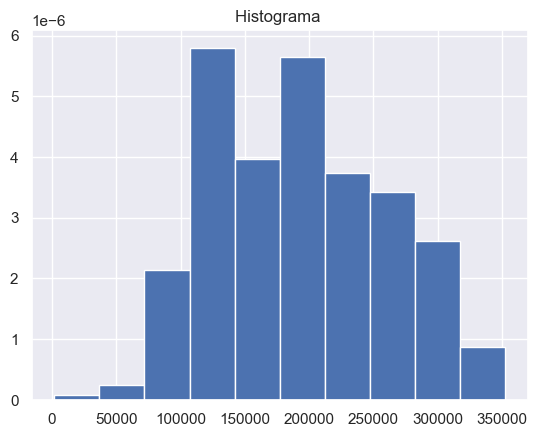

In [85]:
#Criando o gráfico
plt.hist(x=df["valor"],density=True)

#Colocando nome no gráfico
plt.title("Histograma do preço dos automóveis ")

Text(0.5, 1.0, 'Boxplot')

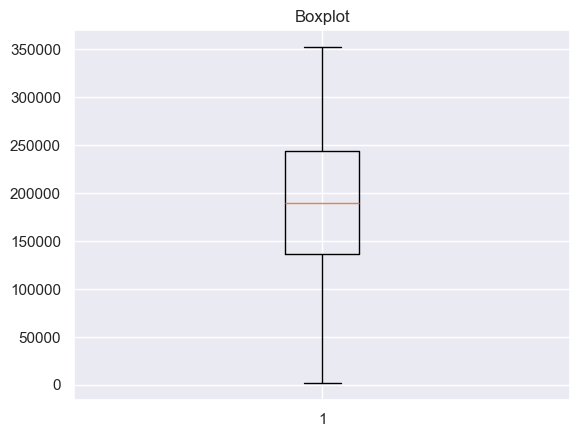

In [82]:
#Criando o gráfico de linha
plt.boxplot(x=df["valor"])

#Colocando nome no gráfico
plt.title("Boxplot")

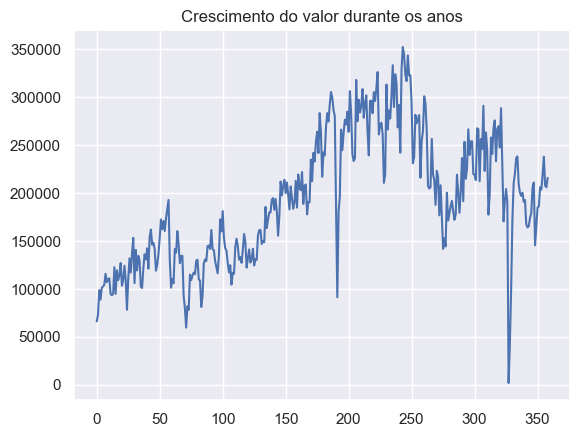

In [109]:
#Criando o gráfico de linha
df["valor"].plot()

#Colocando nome no gráfico
plt.title("Crescimento do valor durante os anos")

#Mostrando o gráfico
plt.show()

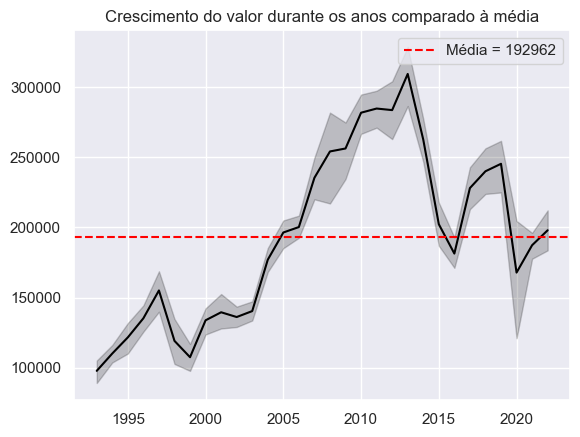

In [137]:
#Pegando a média
media = df["valor"].mean()

#Criando as linhas do gráfico
sns.lineplot(data=df,x="ano",y="valor",color="black")
plt.axhline(media, color='red', linestyle='--', label=f'Média = {media:.0f}')

#Mudando os nomes dos eixos
plt.xlabel("")
plt.ylabel("")

#Colocando nome no gráfico
plt.title("Crescimento do valor durante os anos comparado à média")

#Colocando legendas
plt.legend()

#Mostrando o gráfico
plt.show()

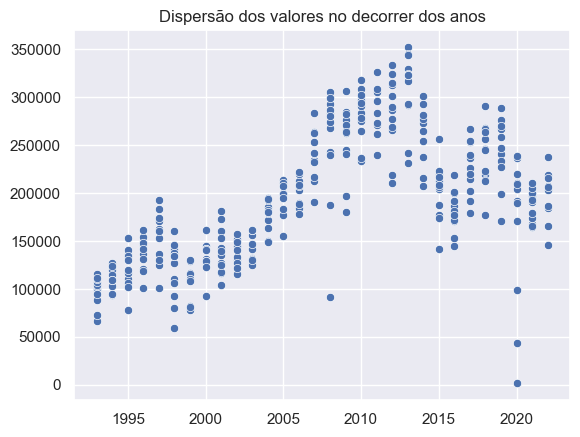

In [140]:
#Criando gráfico de linha
sns.scatterplot(x="ano", y="valor", data=df)

#Mudando os nomes dos eixos
plt.xlabel("")
plt.ylabel("")

#Colocando nome no gráfico
plt.title("Relação dos valores no decorrer dos anos")

#Mostrando o gráfico
plt.show()

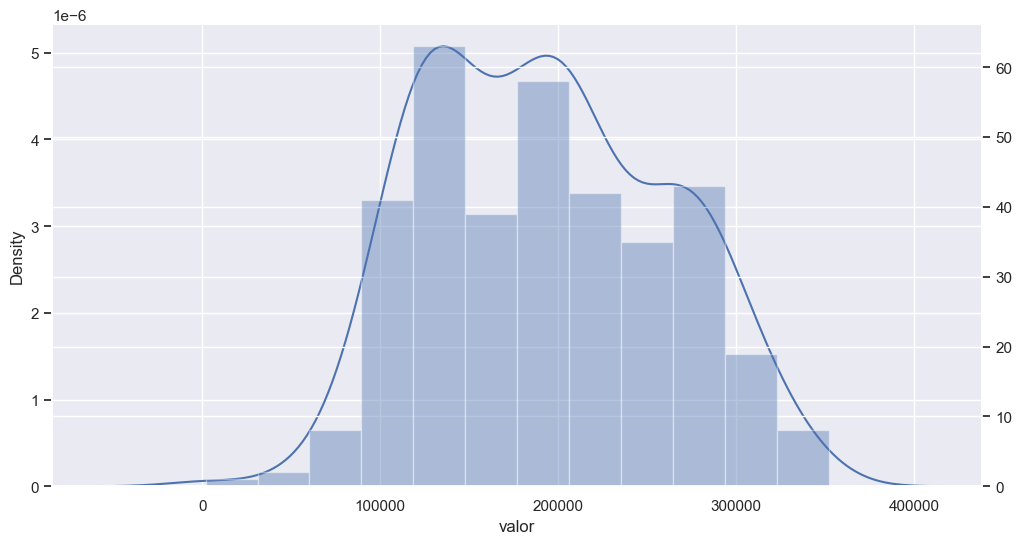

In [151]:
#Criando as variáveis de figura
fig, ax = plt.subplots(figsize=(12, 6))

g1 = sns.distplot(df["valor"], ax=ax, 
                  kde=True, hist=False) 

ax_copy = ax.twinx()
g2 = sns.distplot(df["valor"], ax=ax_copy, kde=False, hist=True, norm_hist=False)

#Mostrando o gráfico
plt.show()

MSE (Erro Quadrático Médio): 5581226974.489593


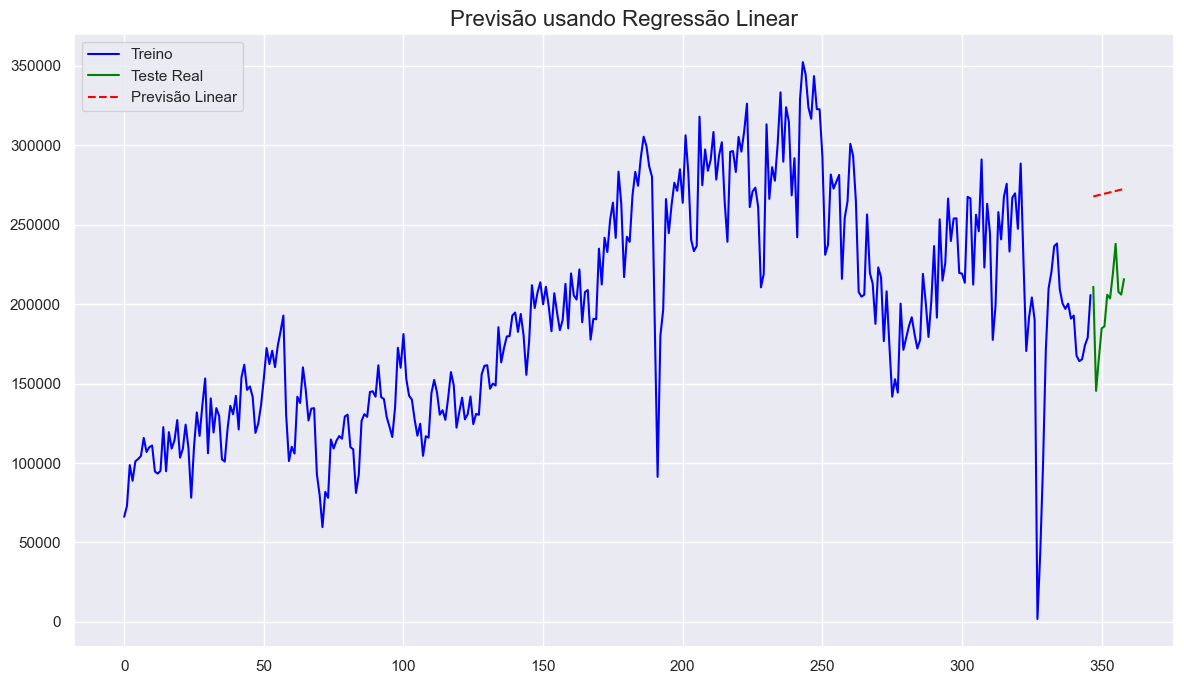

In [159]:
# Divisão de treino e teste
treino = df[:-12]
teste = df[-12:]

# Separando os dados de treino e teste
X_train, y_train = treino.index.values.reshape(-1, 1), treino['valor'].values
X_test, y_test = teste.index.values.reshape(-1, 1), teste['valor'].values

# Modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsão
y_pred = model.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
print(f'MSE (Erro Quadrático Médio): {mse}')

# Visualização
plt.figure(figsize=(12, 7))
plt.plot(train.index, treino['valor'], label="Treino", color='blue')
plt.plot(test.index, teste['valor'], label="Teste Real", color='green')
plt.plot(test.index, y_pred, label="Previsão Linear", linestyle="--", color='red')
plt.title("Previsão usando Regressão Linear", fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
